In [1]:
import xfirst

Welcome to JupyROOT 6.28/04


2023-07-13 15:26:10.772251: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Configure

In [2]:
datadir = 'data'
nshowers = 10000

# model and training configuration
epochs = 100
layers = [32, 32]

# cut configuration
cut = xfirst.config.cut.A2

# features
x = xfirst.profile_functions.usp().parameter_names

# target
y = 'Xfirst'

### Load data

In [3]:
data = xfirst.data.load_fits(
  datadir = datadir,
  cut = cut,
  columns = x,
  xfirst = True,
  norm = x,
  drop_bad = {'train': True, 'validation': True, 'test': False},
  nshowers = nshowers,
)

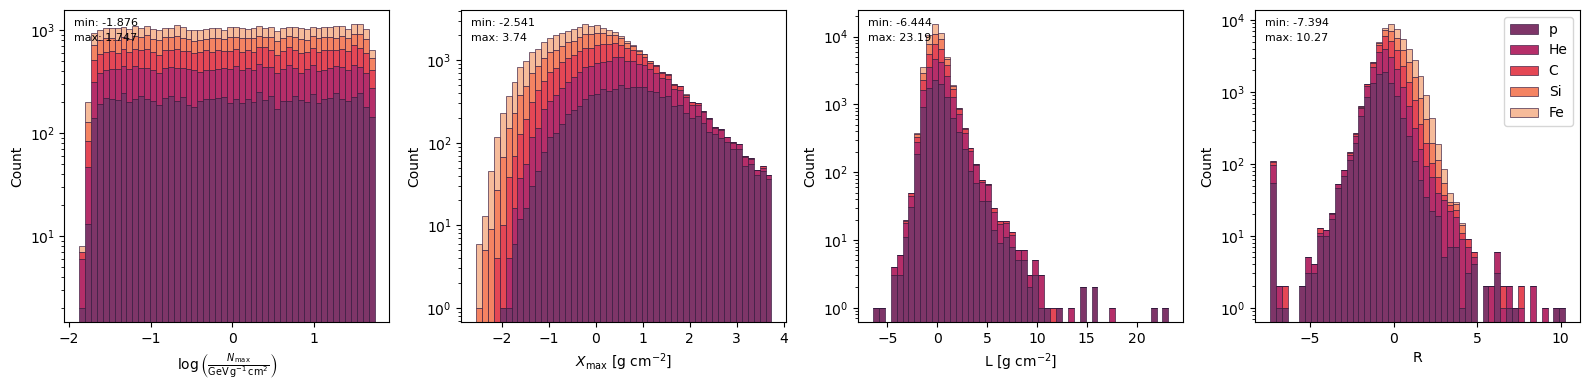

In [4]:
f = xfirst.viz.draw_fit_parameters(data['train'], stat = False, logy = True)

### Train the MLP

In [5]:
model = xfirst.models.multilayer_perceptron_regressor(
  input = len(x),
  layers = layers,
  epochs = epochs,
).fit(data, x, y)

+ training the model on ['lgNmax', 'Xmax', 'L', 'R'] for target Xfirst
Epoch 1/100
1563/1563 [==============================] - 11s 7ms/step - loss: 349.6151 - val_loss: 198.3724 - lr: 0.0010
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 192.2100 - val_loss: 190.0945 - lr: 0.0010
Epoch 3/100
1563/1563 [==============================] - 7s 5ms/step - loss: 187.3490 - val_loss: 186.3928 - lr: 0.0010
Epoch 4/100
1563/1563 [==============================] - 12s 7ms/step - loss: 185.5524 - val_loss: 185.0277 - lr: 0.0010
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 184.4035 - val_loss: 183.9184 - lr: 0.0010
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 183.9756 - val_loss: 184.0819 - lr: 0.0010
Epoch 7/100
1563/1563 [==============================] - 12s 8ms/step - loss: 183.4334 - val_loss: 183.7189 - lr: 0.0010
Epoch 8/100
1563/1563 [==============================] - 11s 7ms/step - loss: 183.330

2023-07-13 15:26:28.137877: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Validation curve

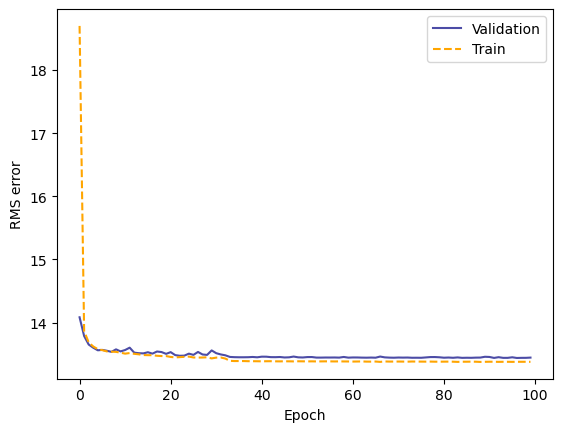

In [6]:
fig = model.draw()

### Compute predictions

+ computing predictions
1563/1563 [==============================] - 4s 3ms/step
+ drawing predictions


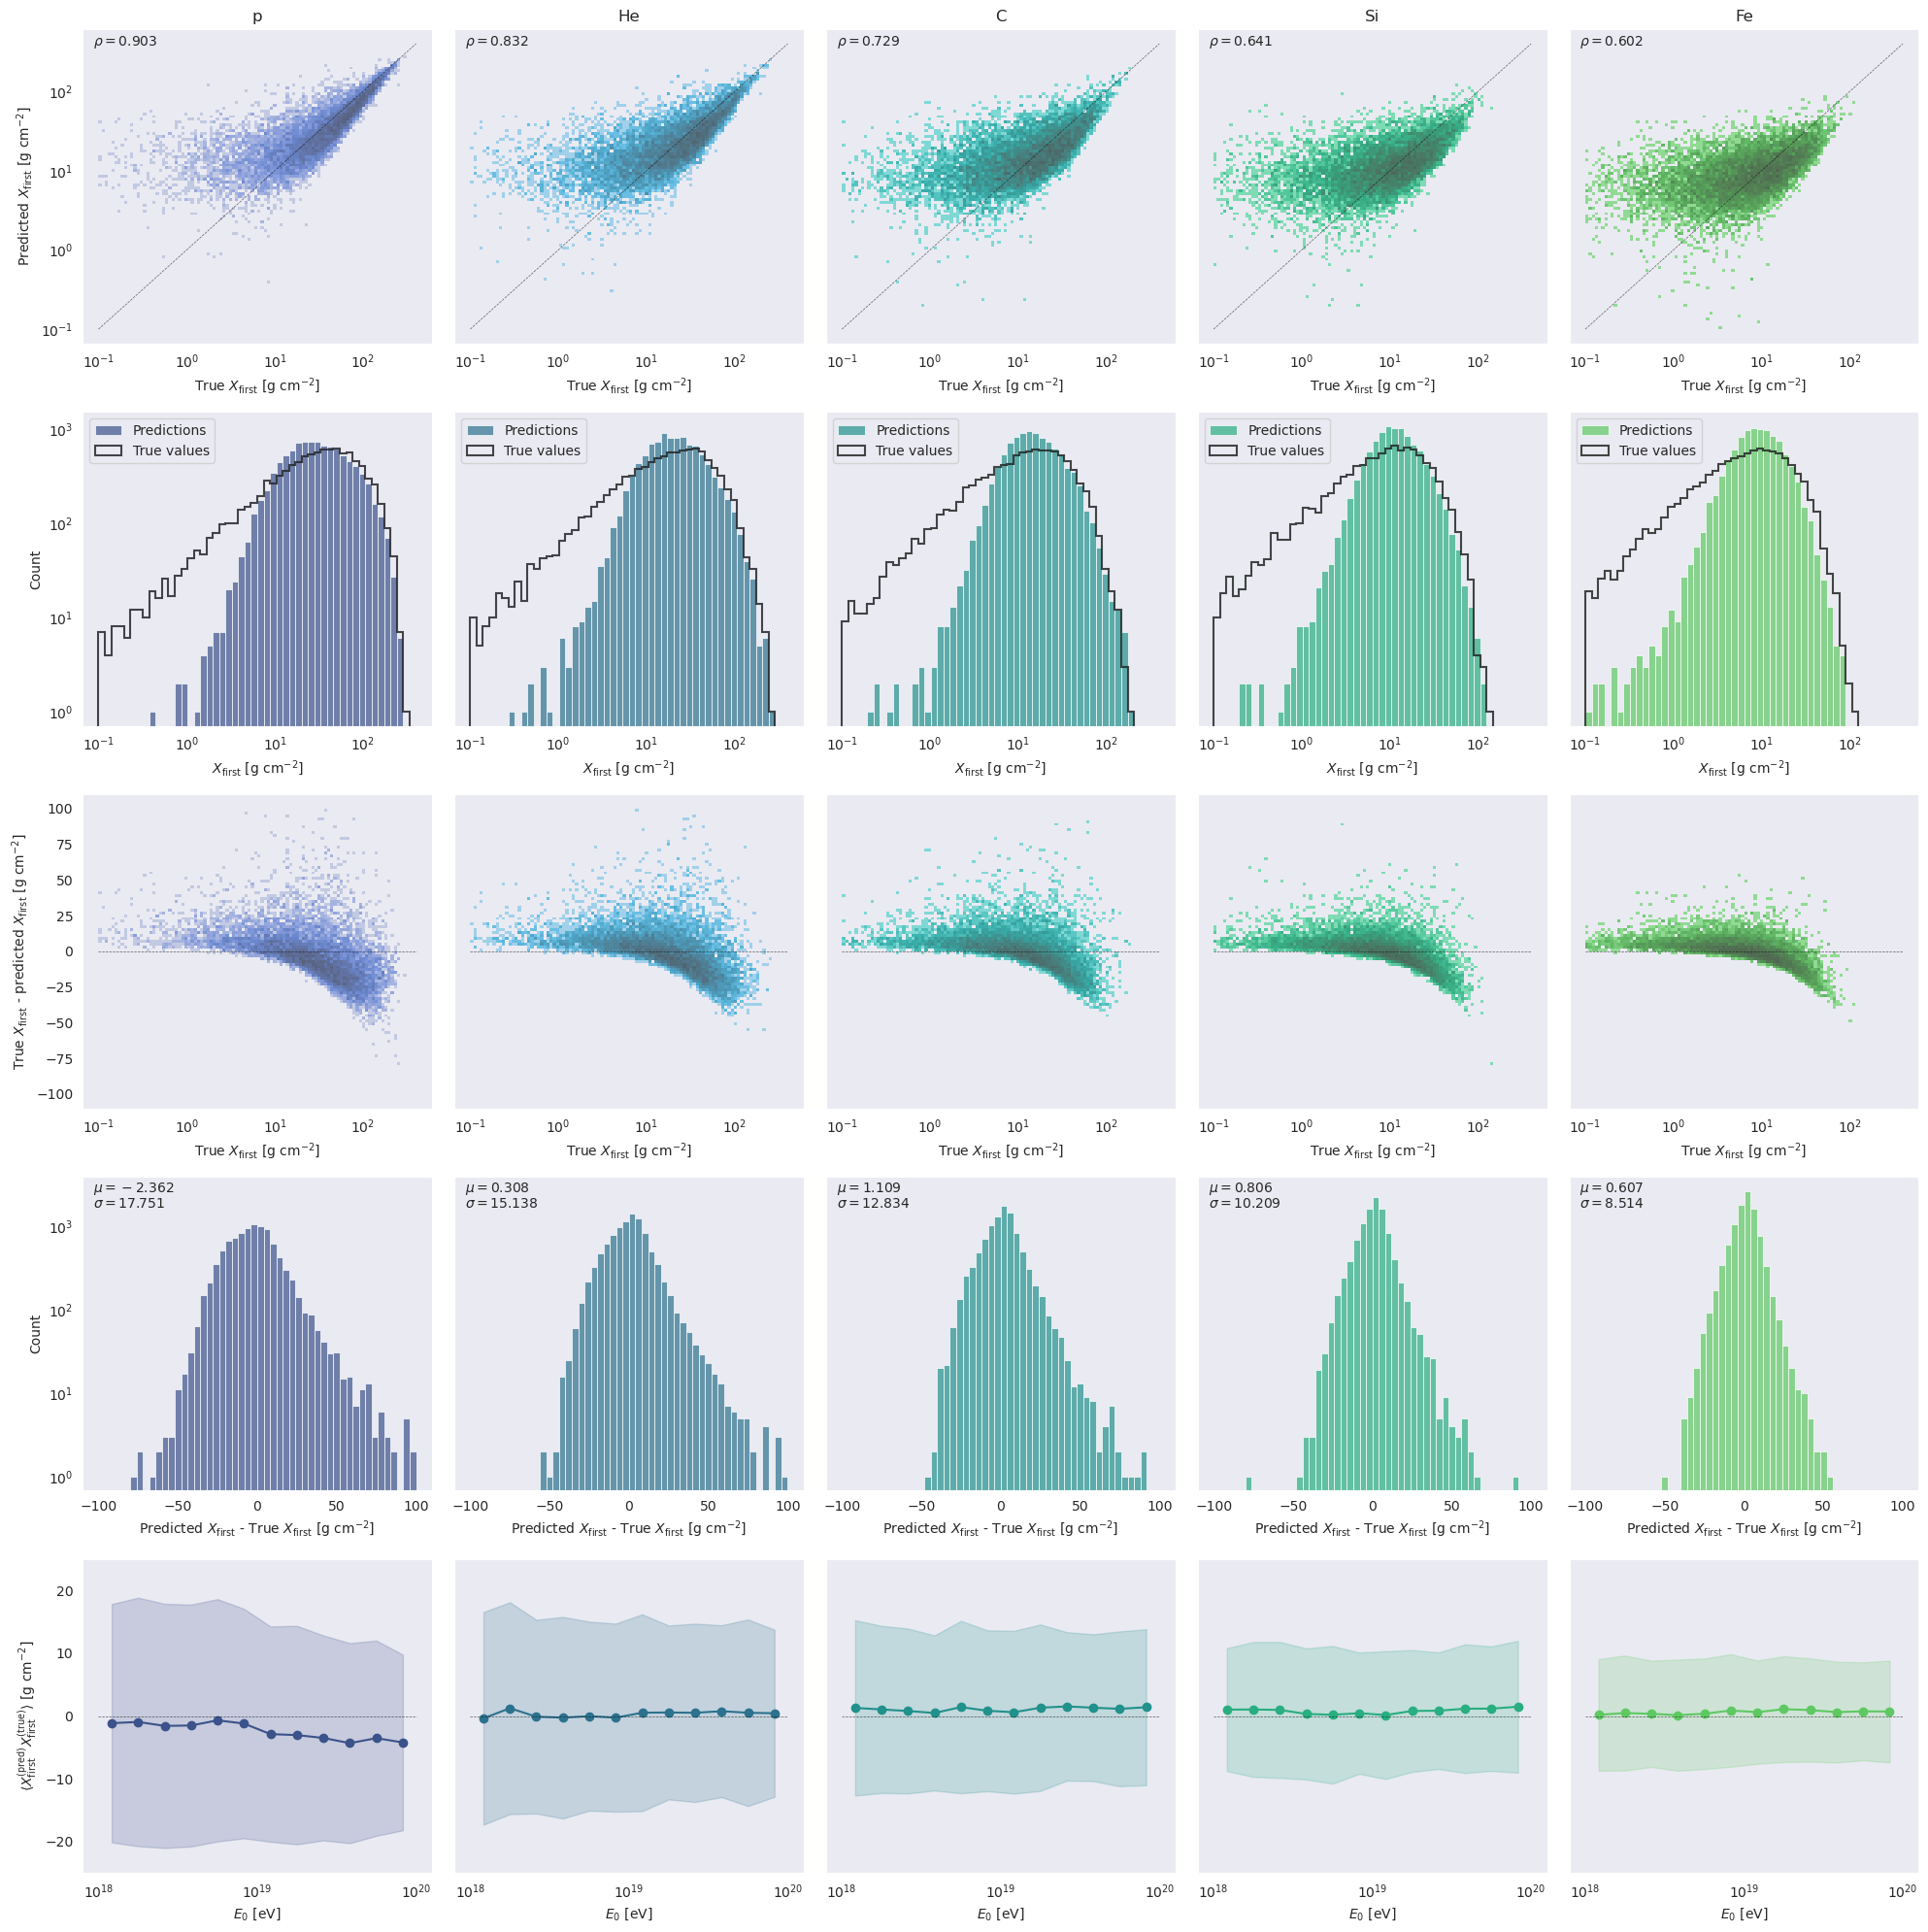

In [15]:
results = model.eval(data, plot = True)